In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
nx = 350
nz = 200


In [5]:
# gera a matriz
v = np.zeros((nx, nz), dtype='float32')
v[:,0:51] = 1500
v[:,51:101] = 2000
v[:,101:185] = 2500
v[:,185:200] = 3000



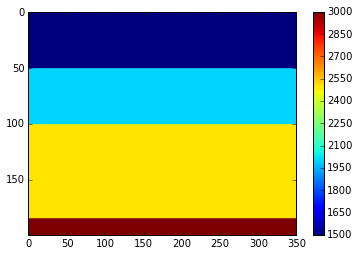

In [6]:
v = v.reshape((nx, nz))
plt.imshow(v.T, aspect='auto')
plt.colorbar()
plt.show()

In [7]:
v.tofile("camadas.bin")

# Gera arquivo de aquisição

In [8]:
lista = []

# adiciona fonte
lista.append([30., 1750., 0., 0., 0.])
rz = 20
dx = 10
xi = 0
rx = xi
while rx <= 3500.:
    lista.append([rz, rx, 0., 0., 0.])
    rx += dx
lista = np.array(lista)

In [9]:
np.savetxt("aquisicao", lista, fmt='%5.1f')

# Gera modelo inicial

In [14]:
# gera a matriz
v0 = np.zeros((nx, nz), dtype='float32')
v0 = v0.reshape((nx, nz))
v0[:,0:51] = 1500
grad = np.linspace(1500, 3000, 150)
print grad.shape
#v0[:,50:200]=2000
v0[:,50:200]=grad
v0.tofile("m0.dat")

(150,)


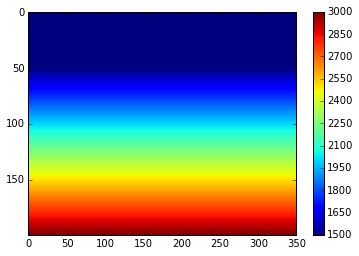

In [15]:
v0 = np.fromfile("m0.dat", dtype=np.float32)
v0 = v0.reshape((nx, nz))
plt.imshow(v0.T, aspect='auto')
plt.colorbar()
plt.show()

# Gera arquivos de aquisição

In [47]:
sz = 30.
sx = 40.
dsx = 250.
drx = 20
rz = 20.
tiro=0
while sx < 3500.:
    lista = []
    # adiciona fonte
    lista.append([sz, sx, 0., 0., 0.])
    xi = 20
    rx = xi
    while rx < 3500.:
        lista.append([rz, rx, 0., 0., 0.])
        rx += drx
    lista = np.array(lista)
    nome="aquis/tiro"+str(tiro)
    np.savetxt(nome, lista, fmt='%5.1f')  
    tiro+=1
    sx += dsx

    